In [153]:
# Import all the Neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import tensorflow.keras as tf
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from collections import Counter

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

plt.style.use("fivethirtyeight")
sns.set(style = "ticks")

In [3]:
# Reading the DataFrame using Pandas Read_csv option
df = pd.read_csv("Data Set.csv")

In [4]:
# Looking at the top 5 records
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62.0,no,no,148.35,12.2,16.81,82,1.0,4,1,0.0
1,2015,100643,340-5930,Female,39,149.0,no,no,294.45,7.7,33.37,87,3.0,3,2,0.0
2,2015,100756,372-3750,Female,65,126.0,no,no,87.30,11.9,9.89,91,1.0,4,5,1.0
3,2015,101595,331-4902,Female,24,131.0,no,yes,321.30,9.5,36.41,102,4.0,3,3,0.0
4,2015,101653,351-8398,Female,40,191.0,no,no,243.00,10.9,27.54,83,7.0,3,1,0.0


In [5]:
# By observing the above DataFrame we can clearly see that customer_id and phone_no 
# Dosen't provide any information for the Analysis so we can remove them
df.drop(['customer_id','phone_no'],axis=1,inplace=True)

In [6]:
# Basic info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   gender                  1976 non-null   object 
 2   age                     2000 non-null   int64  
 3   no_of_days_subscribed   1980 non-null   float64
 4   multi_screen            2000 non-null   object 
 5   mail_subscribed         2000 non-null   object 
 6   weekly_mins_watched     1990 non-null   float64
 7   minimum_daily_mins      2000 non-null   float64
 8   maximum_daily_mins      2000 non-null   float64
 9   weekly_max_night_mins   2000 non-null   int64  
 10  videos_watched          1975 non-null   float64
 11  maximum_days_inactive   1972 non-null   object 
 12  customer_support_calls  2000 non-null   int64  
 13  churn                   1965 non-null   float64
dtypes: float64(6), int64(4), object(4)
memor

In [7]:
# Statistical Description of the DataFrame
df.describe()

,year,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
count,2000.000000,2000.00000,1980.000000,1990.000000,2000.000000,2000.000000,2000.000000,1975.000000,2000.000000,1965.000000
mean,2015.322000,38.69050,99.888384,454.721809,10.198700,30.620780,100.415500,4.488608,1.547000,0.133333
std,1.466762,10.20641,39.727167,2235.190834,2.785519,9.129165,19.529454,2.491067,1.315164,0.340021
min,2015.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000
25%,2015.000000,32.00000,73.000000,219.450000,8.400000,24.735000,87.000000,3.000000,1.000000,0.000000
50%,2015.000000,37.00000,99.000000,271.875000,10.200000,30.590000,101.000000,4.000000,1.000000,0.000000
75%,2015.000000,44.00000,127.000000,326.212500,12.000000,36.797500,114.000000,6.000000,2.000000,0.000000
max,2022.000000,82.00000,243.000000,27990.000000,20.000000,59.640000,175.000000,19.000000,9.000000,1.000000


In [8]:
# Shape of the DataFrame
df.shape

(2000, 14)

In [9]:
# Writing a function to Filter out the Missing Columns along with the DataType and Percentage of Missing values
def missing_values(data):
    cols_list = []
    count_list = []
    perc_list = []
    d_type_list = []
    unique_list = []
    for col in data.columns:
        count = data[col].isnull().sum()
        if count > 0:
            perc = count / data.shape[0]
            cols_list.append(col)
            count_list.append(count)
            perc_list.append(perc)
            unique_list.append(data[col].nunique())
            d_type_list.append(data[col].dtypes)
    missing_df = pd.DataFrame({"Columns":cols_list,"NO.of.Missing_values":count_list,"Percentage":perc_list,"Unique":unique_list,"DataType":d_type_list})
    return missing_df

In [10]:
df.head()

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,Female,36,62.0,no,no,148.35,12.2,16.81,82,1.0,4,1,0.0
1,2015,Female,39,149.0,no,no,294.45,7.7,33.37,87,3.0,3,2,0.0
2,2015,Female,65,126.0,no,no,87.30,11.9,9.89,91,1.0,4,5,1.0
3,2015,Female,24,131.0,no,yes,321.30,9.5,36.41,102,4.0,3,3,0.0
4,2015,Female,40,191.0,no,no,243.00,10.9,27.54,83,7.0,3,1,0.0


In [11]:
# from the above sample we can see that only gender, multi_screen and mail_subscribed 
# columns contains Object columns
cat_cols = ['gender','multi_screen','mail_subscribed']

In [12]:
df[cat_cols]

,gender,multi_screen,mail_subscribed
0,Female,no,no
1,Female,no,no
2,Female,no,no
3,Female,no,yes
4,Female,no,no
...,...,...,...
1995,Female,no,yes
1996,Male,no,no
1997,NaN,no,no
1998,Male,no,no


In [13]:
# Separating numerical columns from all the columns
num_cols = [col for col in df.columns if col not in cat_cols]

In [14]:
missing_values(df)

,Columns,NO.of.Missing_values,Percentage,Unique,DataType
0,gender,24,0.0120,6,object
1,no_of_days_subscribed,20,0.0100,204,float64
2,weekly_mins_watched,10,0.0050,1248,float64
3,videos_watched,25,0.0125,19,float64
4,maximum_days_inactive,28,0.0140,8,object
5,churn,35,0.0175,2,float64


In [15]:
# Let's impute the values for Gender column
df['gender'].value_counts()

Male      1048
Female     918
0            4
1            4
9            1
4            1
Name: gender, dtype: int64

In [16]:
# From the Above Output we can see that Gender column has some noise , Let's clean it out.

In [17]:
# Droping the Rows whcih contains Gender column with ("1","0","9","4")
for gender in ["1","0","9","4"]:
    gender_df = df[df['gender'] == gender].index
    df = df.drop(index=gender_df)

In [18]:
# Let's check whether the changed applied or Not.
df['gender'].value_counts()

Male      1048
Female     918
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

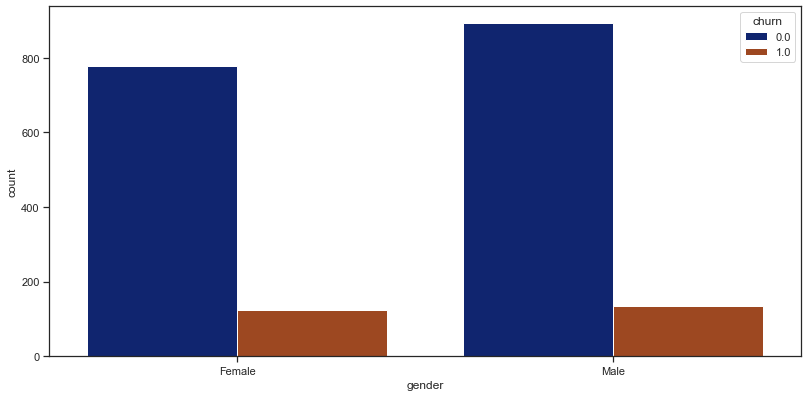

In [20]:
# Let's check the Frequency of the Gender column wrt to the Churn Rate.
plt.figure(figsize=(12,6))
sns.countplot(df['gender'],palette='dark',hue=df['churn'])

In [21]:
# Filling the missing records in Gender column with Most Frequent Label , in this case MODE.
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

In [22]:
# Let's map the gender column with Numerical values 
df['gender'] = df['gender'].map({"Male":0,"Female":1})

In [23]:
# Done with gender column

In [24]:
cat_cols

['gender', 'multi_screen', 'mail_subscribed']

In [25]:
# Let's focus on multi_screen column
df['multi_screen'].isnull().sum()

0

In [26]:
# There no missing values in "multi_screen" column

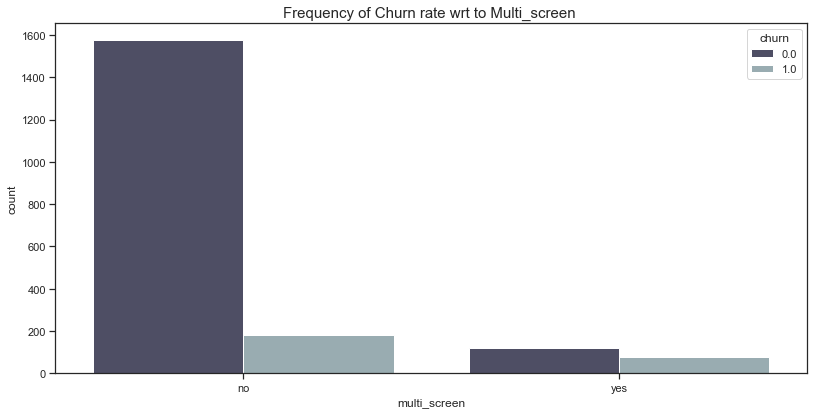

In [28]:
# Let's Visualize the frequency of multi_screen column wrt to Churn rate.
plt.figure(figsize=(12,6))
sns.countplot(df['multi_screen'],hue=df['churn'],palette="bone")
plt.title("Frequency of Churn rate wrt to Multi_screen ",fontsize=15)
plt.show()

In [29]:
# There is no Missing value in multi_screen column , so we can map it with numerical values
# Now, Let's check the number of Unique values in the Column 
df['multi_screen'].unique()

array(['no', 'yes'], dtype=object)

In [30]:
# Since there is only 2 missing values we can use 1 and 0 for Yes and no respectivley
df['multi_screen'] = df['multi_screen'].map({"no":0,"yes":1})

In [31]:
# Look at the Transformed Unique Values.
df['multi_screen'].unique()

array([0, 1], dtype=int64)

In [32]:
# Now preprocess the mail_subscribed column
df['mail_subscribed'].isnull().sum()

0

Text(0.5, 1.0, 'Frequency of Churn rate wrt Mail Subscribed ')

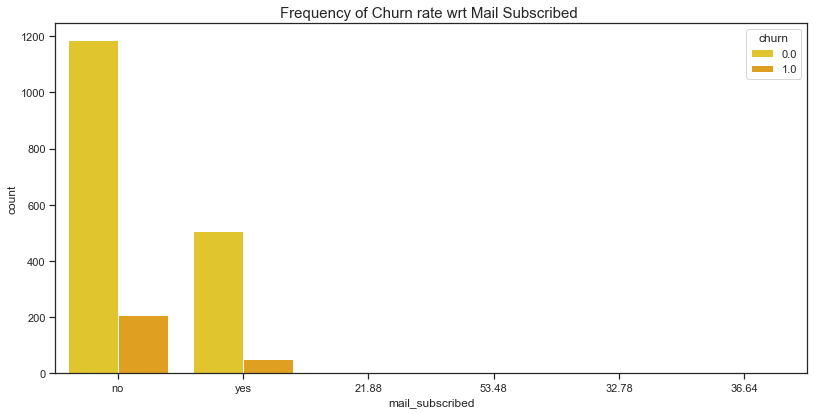

In [33]:
# Let's Visualize the frequency of mail_subscribed column wrt to Churn rate.
plt.figure(figsize=(12,6))
sns.countplot(df['mail_subscribed'],hue=df['churn'],palette="Wistia")
plt.title("Frequency of Churn rate wrt Mail Subscribed ",fontsize=15)

In [35]:
# No missing values in mail_subscribed column also so let's check the number of unique values and map them
mail_unique = df['mail_subscribed'].unique()
mail_unique

array(['no', 'yes', '21.88', '53.48', '32.78', '36.64'], dtype=object)

In [36]:
# There is some noise in mail_subscribed column except "no" and "yes" labels , let's remove it 
for label in mail_unique:
    if label not in ("no","yes"):
        label_df = df[df['mail_subscribed'] == label].index
        df = df.drop(index=label_df)

In [37]:
# Let's check whether the noise was removed or not
df['mail_subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [38]:
# Now we can map them with Numerical Values
df['mail_subscribed'] = df['mail_subscribed'].map({"no":0,"yes":1})

In [39]:
# we have successfully preprocessed and labeled categorical columns
# let's check how they look after the preprocessing
df[cat_cols]

,gender,multi_screen,mail_subscribed
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,1
4,1,0,0
...,...,...,...
1995,1,0,1
1996,0,0,0
1997,0,0,0
1998,0,0,0


In [40]:
# Now let's focus on the Numerical Columns
df[num_cols]

,year,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,36,62.0,148.35,12.2,16.81,82,1.0,4,1,0.0
1,2015,39,149.0,294.45,7.7,33.37,87,3.0,3,2,0.0
2,2015,65,126.0,87.30,11.9,9.89,91,1.0,4,5,1.0
3,2015,24,131.0,321.30,9.5,36.41,102,4.0,3,3,0.0
4,2015,40,191.0,243.00,10.9,27.54,83,7.0,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,54,75.0,182.25,11.3,20.66,97,5.0,4,2,NaN
1996,2015,45,127.0,273.45,9.3,30.99,116,3.0,3,1,0.0
1997,2015,53,94.0,128.85,15.6,14.60,110,16.0,5,0,0.0
1998,2015,40,94.0,178.05,10.4,20.18,100,6.0,NaN,3,0.0


In [42]:
# Finding out the Missing columns from the Numerical Columns.
missing_values(df[num_cols])

,Columns,NO.of.Missing_values,Percentage,Unique,DataType
0,no_of_days_subscribed,20,0.010070,204,float64
1,weekly_mins_watched,10,0.005035,1246,float64
2,videos_watched,25,0.012588,19,float64
3,maximum_days_inactive,27,0.013595,8,object
4,churn,35,0.017623,2,float64


In [43]:
# Looking at the Year column
df['year'].value_counts()

2015    1894
2022      92
Name: year, dtype: int64

In [45]:
# Checking the Age column
df['age'].value_counts()

36    103
38    102
35     97
37     93
34     86
     ... 
80      1
76      1
77      1
79      1
82      1
Name: age, Length: 63, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

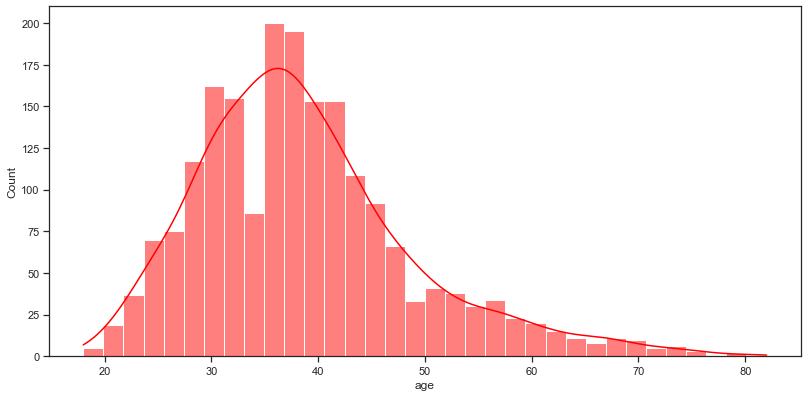

In [48]:
# Looking at the Distribution of the Age column.
plt.figure(figsize = (12,6))
sns.histplot(df['age'],color='red',kde=True)

In [49]:
# Except Right Skewed Distribution  there is no noise or anything in age column

In [50]:
# Checking the no_of_days_subscribed column
df['no_of_days_subscribed'].value_counts()

86.0     27
99.0     26
87.0     26
93.0     25
92.0     24
         ..
212.0     1
26.0      1
232.0     1
184.0     1
208.0     1
Name: no_of_days_subscribed, Length: 204, dtype: int64

In [51]:
# Checking for the missing values in the column
df['no_of_days_subscribed'].isnull().sum()

20

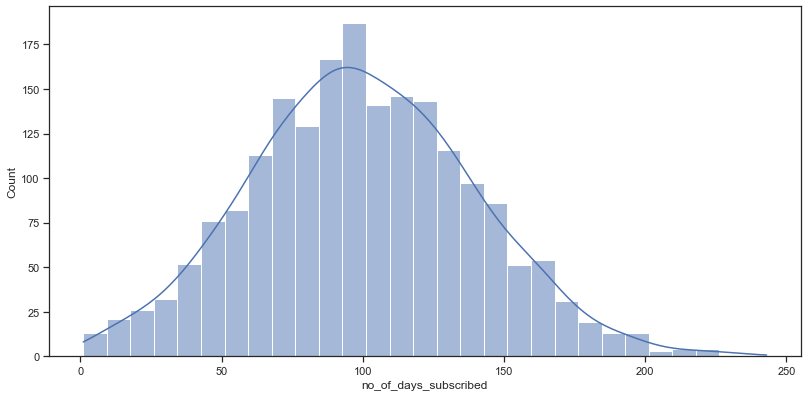

In [52]:
# Plotting the Distribution of the column
plt.figure(figsize=(12,6))
sns.histplot(df['no_of_days_subscribed'],kde=True)
plt.show()

In [53]:
# The distribution is approximately Normal so we can impute it with mean or median
df['no_of_days_subscribed'].fillna(int(df['no_of_days_subscribed'].median()),inplace=True)

In [54]:
# Finding out number of missing values in weekly_mins_watched column
df['weekly_mins_watched'].isnull().sum()

10

In [55]:
# Looking for the Value_counts
df['weekly_mins_watched'].value_counts()

1000.00     10
231.00       7
235.65       6
213.45       6
27986.00     6
            ..
151.20       1
216.75       1
473.40       1
229.20       1
342.90       1
Name: weekly_mins_watched, Length: 1246, dtype: int64

<AxesSubplot:xlabel='weekly_mins_watched', ylabel='Count'>

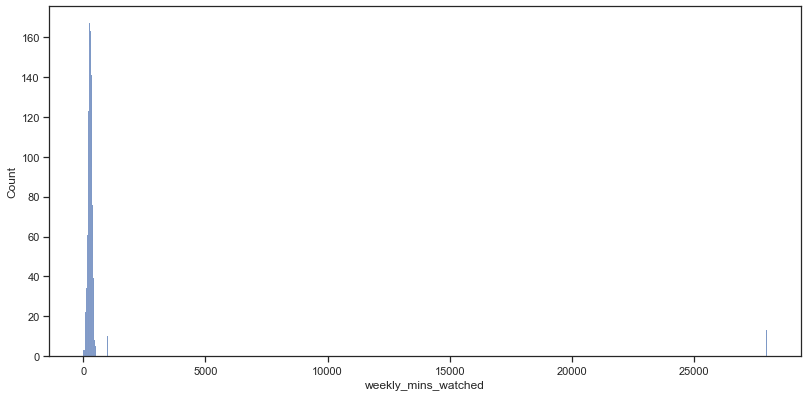

In [56]:
# Plotting the Distribution
plt.figure(figsize=(12,6))
sns.histplot(df['weekly_mins_watched'])

In [57]:
# From the Above Plot we can easily see that there is an Outliers present at 28000+ values. 
# Keep this in mind that there are some outliers in the feature columns

In [59]:
# Let's see can we remove that point 
df['weekly_mins_watched'].sort_values(ascending=False).head(20)

1446    27990.0
1445    27989.0
1453    27988.0
1448    27988.0
1451    27988.0
1444    27988.0
1443    27987.0
1442    27986.0
1449    27986.0
1454    27986.0
1450    27986.0
1452    27986.0
1447    27986.0
1278     1000.0
1286     1000.0
1285     1000.0
1284     1000.0
1283     1000.0
1282     1000.0
1281     1000.0
Name: weekly_mins_watched, dtype: float64

#### As we knew that there will be 10,080 minutes will be there in a week , so if a person mentioned that he was watching more than 10,080 minutes per week , he was lying . So we cannot take those values into Consideration

#### Let's remove those records which are having a value more that 10,080 

In [63]:
# Filtering out the DataFrame with the Weekly_mins_watched which are less than 10080 mins
df = df[df['weekly_mins_watched'] <= 10080]

In [64]:
# Let's see whether those values removed or not.
df['weekly_mins_watched'].sort_values(ascending=False).head(20)

1283    1000.00
1280    1000.00
1286    1000.00
1277    1000.00
1278    1000.00
1279    1000.00
1284    1000.00
1285    1000.00
1282    1000.00
1281    1000.00
1523     520.20
1261     506.10
1838     503.25
1126     501.45
31       499.35
283      494.70
1936     489.75
348      483.75
43       483.45
994      481.95
Name: weekly_mins_watched, dtype: float64

<AxesSubplot:xlabel='weekly_mins_watched', ylabel='Count'>

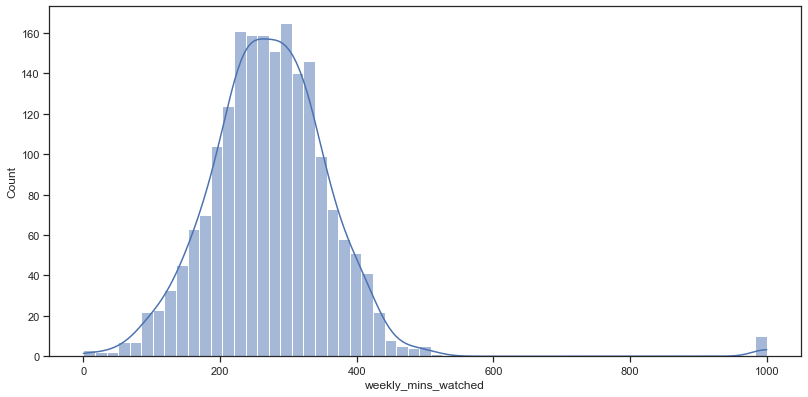

In [66]:
# Let's see the distribution after removing the Outliers
# Plotting the Distribution
plt.figure(figsize=(12,6))
sns.histplot(df['weekly_mins_watched'],kde=True)

#### Even though 1000 is also seeming like an Outlier , let's keep it for now and remove it later using Inter-Quartile ranges

In [67]:
# As see before there are 10 missing values in weekly_mins_watched so let's fill them with median
df['weekly_mins_watched'].fillna(int(df['weekly_mins_watched'].median()),inplace=True)

In [70]:
# Finding the number of missing values in minimum_daily_mins
df['minimum_daily_mins'].isnull().sum()

0

In [71]:
# Looking at the Value_counts.
df['minimum_daily_mins'].value_counts()

9.5     37
11.3    37
11.4    36
11.1    33
10.6    33
        ..
16.7     1
17.0     1
18.2     1
20.0     1
1.3      1
Name: minimum_daily_mins, Length: 148, dtype: int64

<AxesSubplot:xlabel='minimum_daily_mins', ylabel='Count'>

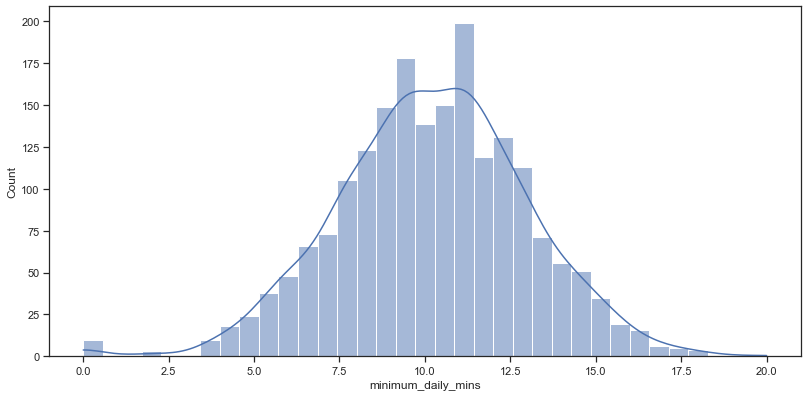

In [72]:
# plotting the Distribuion
plt.figure(figsize=(12,6))
sns.histplot(df['minimum_daily_mins'],kde=True)

In [73]:
# Finding the number of missing values in maximum_daily_mins
df['maximum_daily_mins'].isnull().sum()

0

<AxesSubplot:xlabel='maximum_daily_mins', ylabel='Count'>

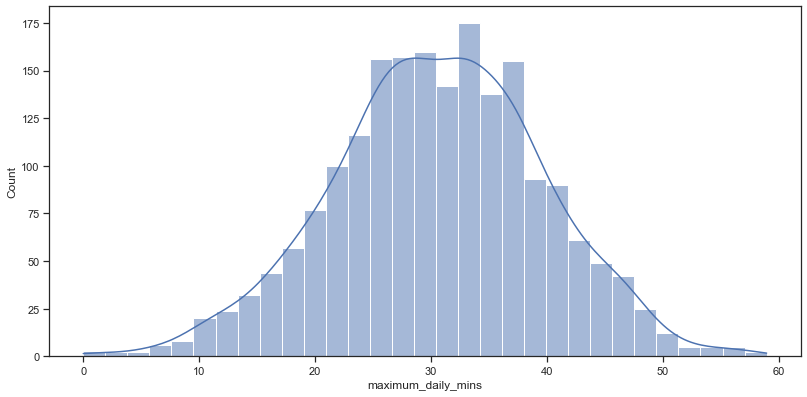

In [74]:
plt.figure(figsize=(12,6))
sns.histplot(df['maximum_daily_mins'],kde=True)

In [75]:
# Finding the missing values in weekly_max_night_mins
df['weekly_max_night_mins'].isnull().sum()

0

<AxesSubplot:xlabel='weekly_max_night_mins', ylabel='Count'>

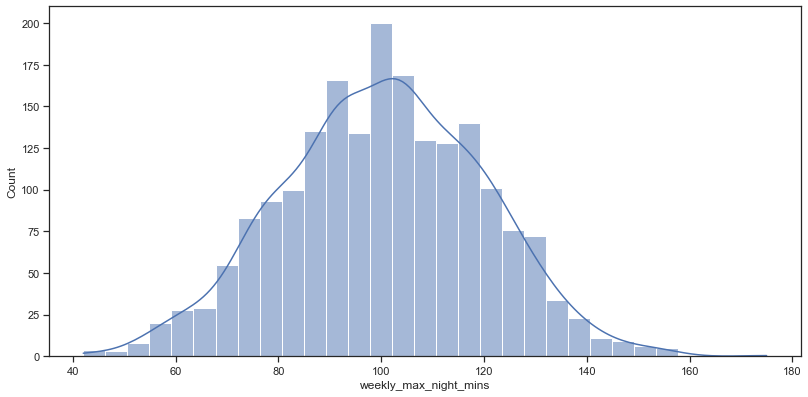

In [76]:
# plotting the Distribution
plt.figure(figsize=(12,6))
sns.histplot(df['weekly_max_night_mins'],kde=True)

In [78]:
# Finding the Missing values in videos_watched column
df['videos_watched'].isnull().sum()

25

<AxesSubplot:xlabel='videos_watched', ylabel='Count'>

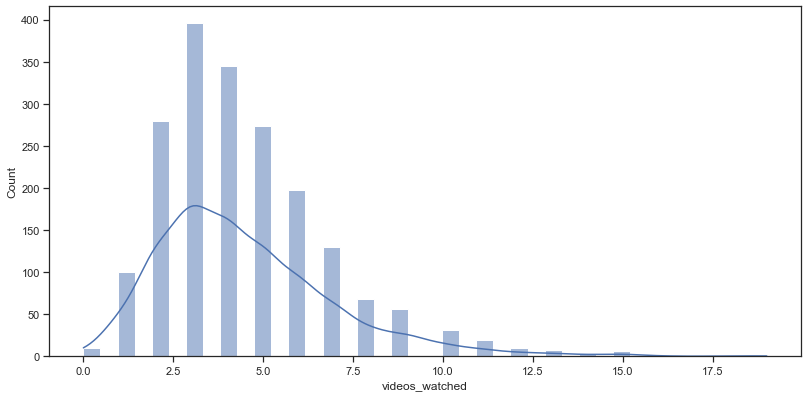

In [79]:
# Plotting the Distribution 
plt.figure(figsize=(12,6))
sns.histplot(df['videos_watched'],kde=True)

In [80]:
# From the above figure we can see that videos_watched column seems like an Categorical Columns
# Let's find out using no of unique values in it.
df['videos_watched'].nunique()

19

In [81]:
# as we can see that there are only 19 unique values in it so we can consider it as Categorical Column

In [82]:
# So let's fill the missing values with mode.
df['videos_watched'].fillna(df['videos_watched'].mode()[0],inplace=True)

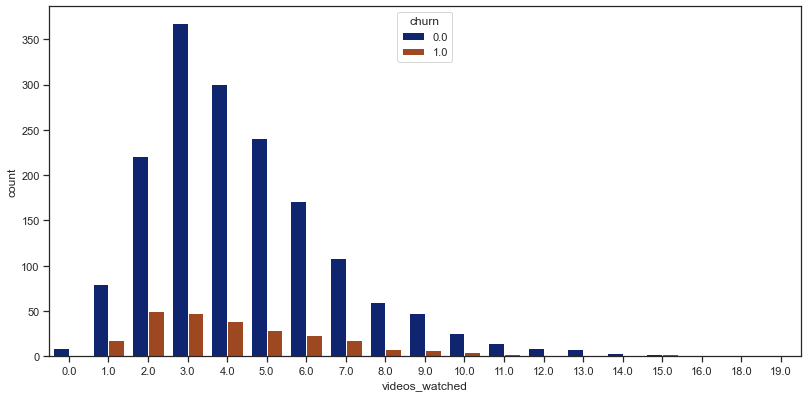

In [84]:
plt.figure(figsize=(12,6))
sns.countplot(df['videos_watched'],palette='dark',hue=df['churn'])
plt.show()

In [85]:
# finding out the number of missing values in maximum_days_inactive
df['maximum_days_inactive'].isnull().sum()

27

In [86]:
# Looking at the unique values in it 
df['maximum_days_inactive'].unique()

array(['4', '3', nan, '2', '5', '1', '0', '6', 'NO'], dtype=object)

In [ ]:
# As we can see that the data is contaminated with a label called "NO", so let's replace it with "0".

In [87]:
# Replacing "NO" with "0"
df['maximum_days_inactive'].replace("NO","0",inplace=True)

In [88]:
# Since it was also an Categorical column because it got only 8-9 unique values we can impute it with mode.
df['maximum_days_inactive'].fillna(df['maximum_days_inactive'].mode()[0],inplace=True)

In [89]:
# Looking at the Changes
df['maximum_days_inactive'].value_counts()

3    954
4    634
2    267
5     83
1     12
0     11
6      2
Name: maximum_days_inactive, dtype: int64

In [90]:
# Let's change the DataType to int
df['maximum_days_inactive'] = df['maximum_days_inactive'].astype("int32")

<AxesSubplot:xlabel='maximum_days_inactive', ylabel='count'>

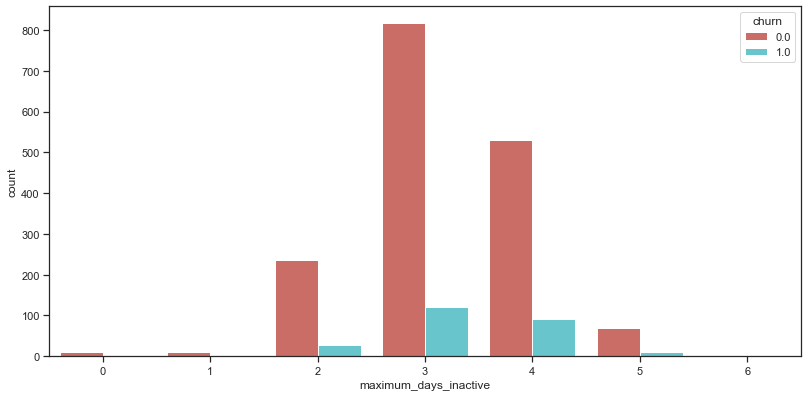

In [91]:
# Plotting the Frequencies
plt.figure(figsize=(12,6))
sns.countplot(df['maximum_days_inactive'],palette='hls',hue=df['churn'])

In [92]:
# Customer_support_calls
df['customer_support_calls'].nunique()

10

In [94]:
# Unique values
df['customer_support_calls'].unique()

array([1, 2, 5, 3, 4, 0, 7, 8, 6, 9], dtype=int64)

In [95]:
# It contains only 10 unique values.

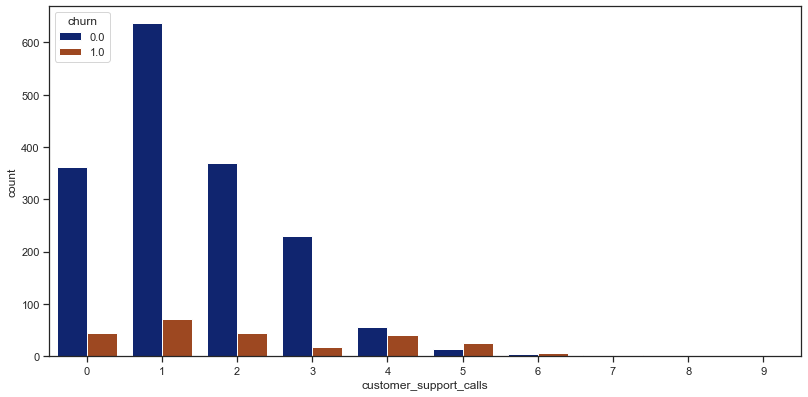

In [96]:
plt.figure(figsize=(12,6))
sns.countplot(df['customer_support_calls'],hue=df["churn"],palette='dark')
plt.show()

In [97]:
# Finally let's check is there any missing values left or not.
df.isnull().sum()

year                       0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive      0
customer_support_calls     0
churn                     35
dtype: int64

In [102]:
marker = dict(markerfacecolor='violet',markeredgecolor='red',markersize=5,marker='o')

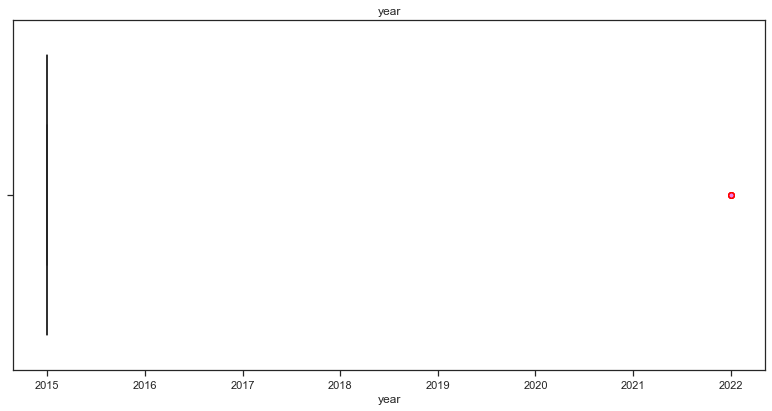

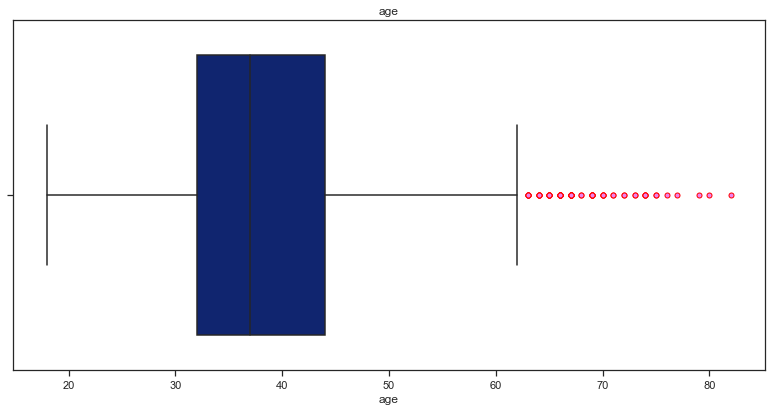

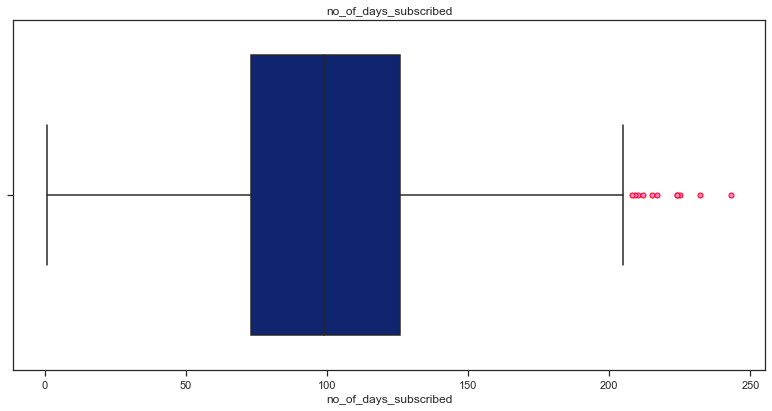

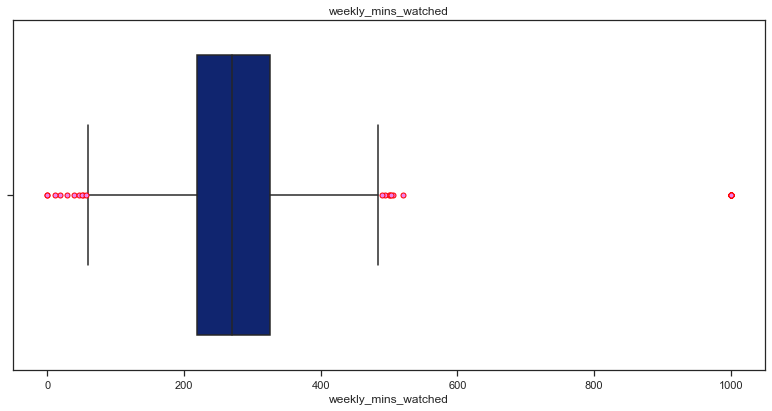

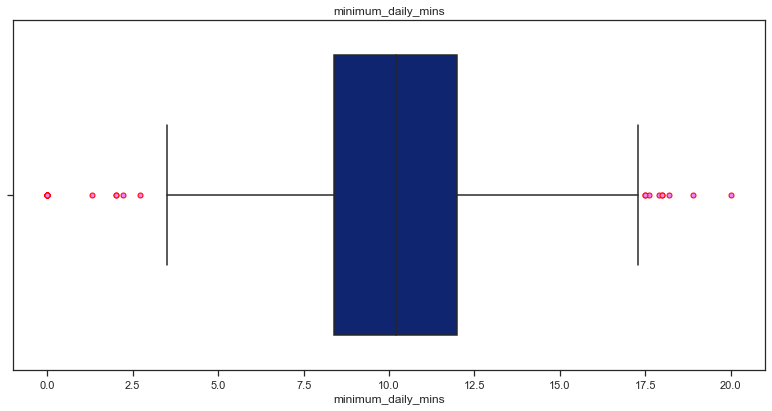

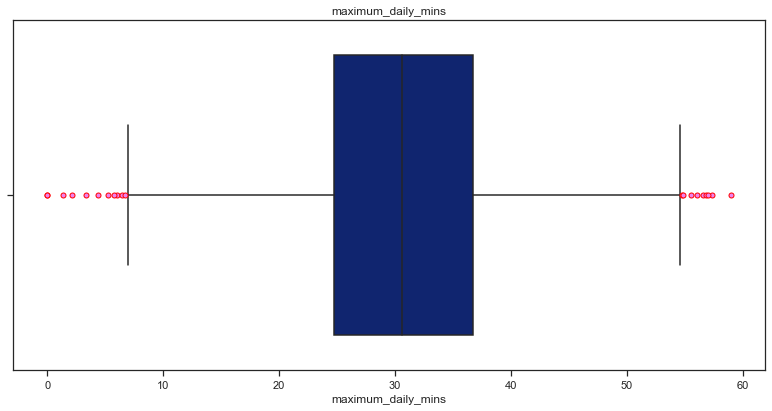

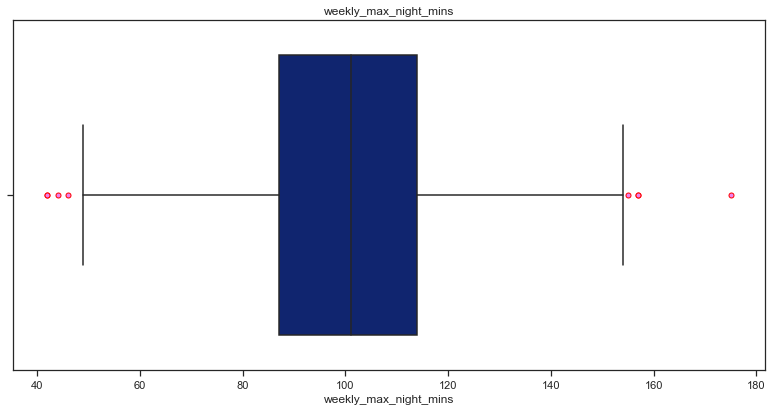

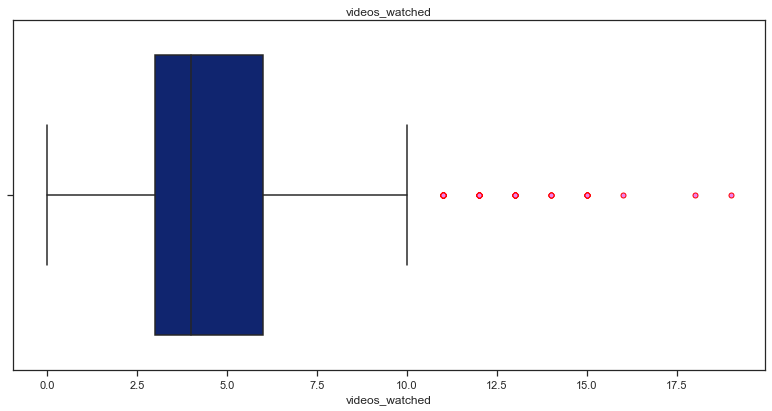

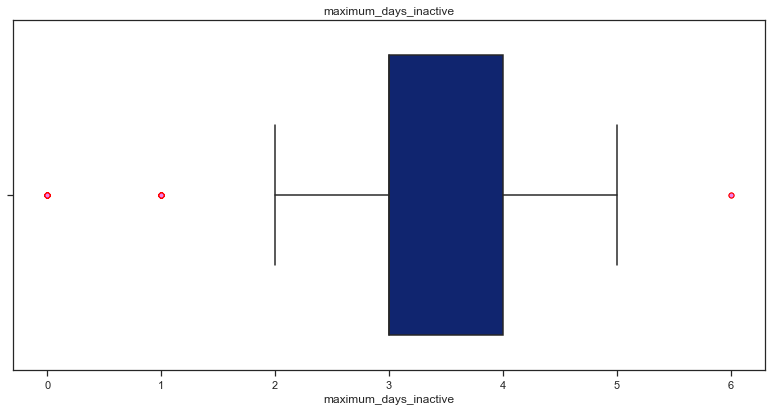

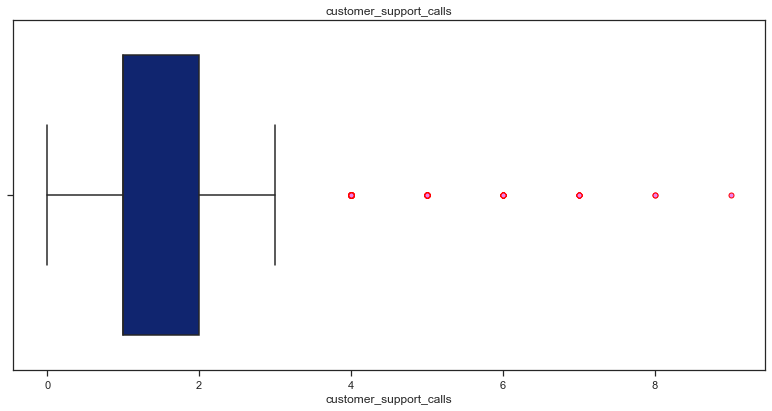

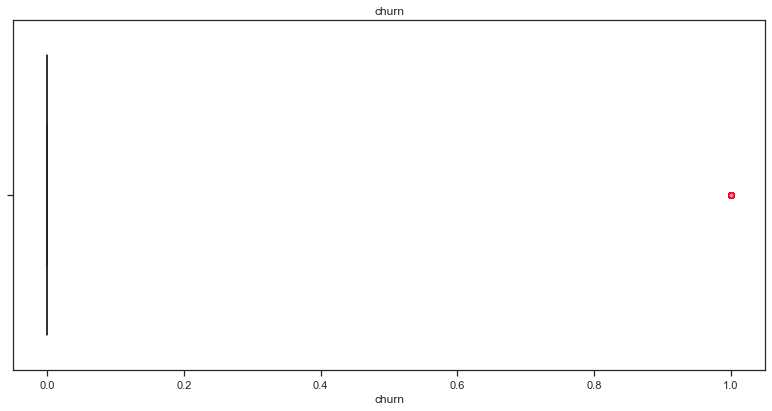

In [103]:
# Detecting Outliers
for col in num_cols:
    plt.figure(figsize=(12,6))
    sns.boxplot(df[col],palette='dark',flierprops = marker)
    plt.title(col)
    plt.show()

In [104]:
df.columns

Index(['year', 'gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')

In [105]:
cols_with_outliers = ["age","no_of_days_subscribed","minimum_daily_mins","maximum_daily_mins","videos_watched"]

In [106]:
# Let's try to remove the Outliers in the numerical columns
def remove_outliers(data,columns):
    for column in columns:
        iqr = np.percentile(data[column],75) - np.percentile(data[column],25)
        lower_boundary = np.percentile(data[column],25) - (1.5 * iqr)
        upper_boundary = np.percentile(data[column],75) + (1.5 * iqr)
#         print(iqr,lower_boundary,upper_boundary)
        data = data[(data[column] >= lower_boundary) & (data[column] <= upper_boundary)]
    return data

In [107]:
data = df.copy()
new_df = remove_outliers(df,cols_with_outliers)

In [108]:
df = new_df.copy()

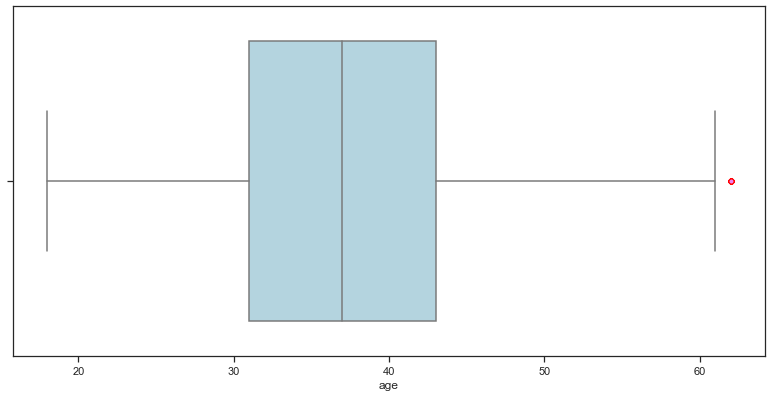

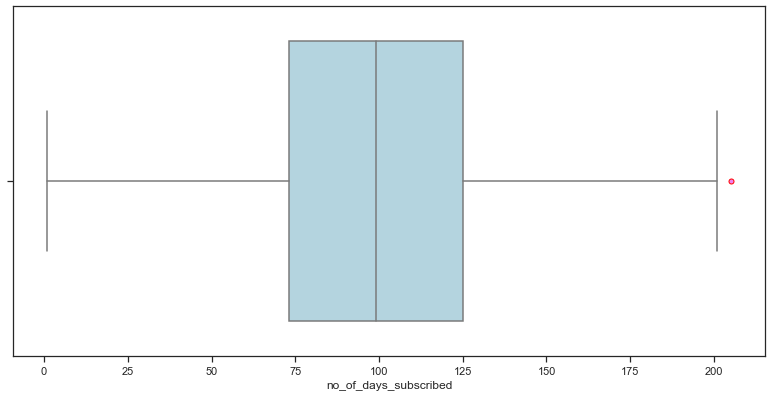

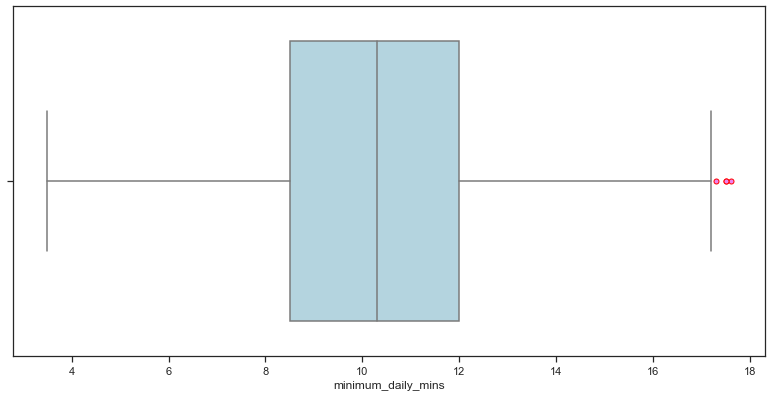

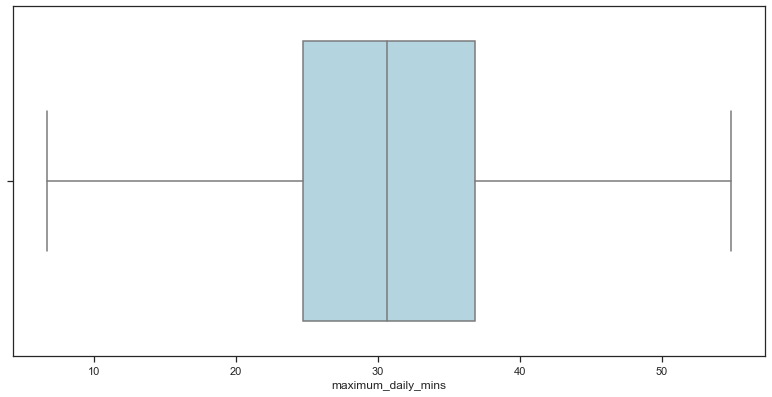

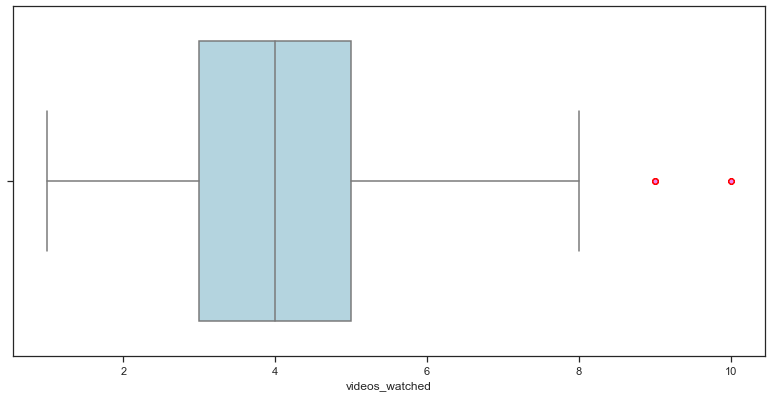

In [110]:
# Checking whether the Outliers are removed or Not.
for column in cols_with_outliers:
    plt.figure(figsize=(12,6))
    sns.boxplot(df[column],color='lightblue',flierprops=marker)
    plt.show()

In [111]:
# as we can see only the target column has the missing values 
# we create a model to fill them 
# before that let's reset the index of the DataFrame
churn_test = df[df['churn'].isnull()]

In [112]:
churn_test.drop("churn",axis=1,inplace=True)

In [113]:
churn_test

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
81,2015,1,36,92.0,0,1,276.00,12.7,31.28,96,3.0,3,2
82,2015,1,39,103.0,0,0,240.30,9.7,27.23,97,2.0,3,0
120,2015,0,32,66.0,0,1,262.05,8.9,29.70,98,2.0,3,1
121,2015,0,37,87.0,0,0,235.20,7.6,26.66,77,6.0,3,1
156,2015,1,37,99.0,0,0,173.25,11.5,19.64,98,7.0,4,7
157,2015,1,28,128.0,0,0,356.85,13.9,40.44,68,4.0,4,1
194,2015,0,31,151.0,1,0,327.00,12.4,37.06,95,1.0,4,0
195,2015,0,40,105.0,0,1,211.80,11.4,24.00,101,2.0,4,1
228,2015,0,38,80.0,0,0,177.15,8.2,20.08,86,6.0,3,1
290,2015,0,60,93.0,1,0,325.35,17.5,36.87,110,5.0,5,1


In [114]:
train_df = df.drop(index=churn_test.index,axis=0)

In [115]:
X = train_df.drop('churn',axis=1)
y = train_df['churn']

In [116]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X,y)
preds = dtc.predict(churn_test)

In [117]:
preds

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [118]:
churn_test['churn'] = preds

In [119]:
df = pd.concat([train_df,churn_test])

In [120]:
df.isnull().sum()

year                      0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [121]:
df.shape

(1805, 14)

In [122]:
# Finally let's check the class imbalance
df['churn'].value_counts() / df.shape[0]

0.0    0.874238
1.0    0.125762
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

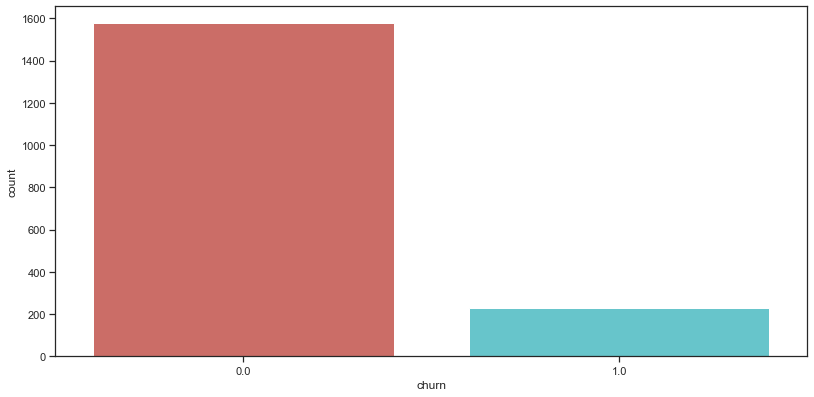

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(df['churn'],palette='hls')

In [124]:
# As we can see now, all the columns are labeled and cleaned.

In [219]:
# Now we can split the data into dependent and independent variables
X = df.drop('churn',axis=1)
y = df['churn']

In [220]:
# Splitting the DAta into train and test.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [221]:
# Logistic Regression 
logmod = LogisticRegression()
logmod.fit(X_train,y_train)
preds = logmod.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.8672566371681416
[[390   2]
 [ 58   2]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       392
         1.0       0.50      0.03      0.06        60

    accuracy                           0.87       452
   macro avg       0.69      0.51      0.50       452
weighted avg       0.82      0.87      0.81       452



In [222]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.8517699115044248
[[383   9]
 [ 58   2]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       392
         1.0       0.18      0.03      0.06        60

    accuracy                           0.85       452
   macro avg       0.53      0.51      0.49       452
weighted avg       0.78      0.85      0.80       452



In [158]:
# for train_ix, test_ix in kfold.split(X, y):
#     count = 1
#     # select rows
#     train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
#     train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
#     # summarize train and test composition
#     train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
#     test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
#     print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
#     model = KNeighborsClassifier()
#     model.fit(train_X,train_y)
# print(f"All the Folds are completed")

# print(50*"*")

# preds = model.predict(test_X)

# print(accuracy_score(test_y,preds))

# print(confusion_matrix(test_y,preds))

# print(classification_report(test_y,preds))

In [223]:
error_rate = []
for k in range(5,21,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    error_rate.append(np.mean(y_test != preds))

Text(0, 0.5, 'Error_rate')

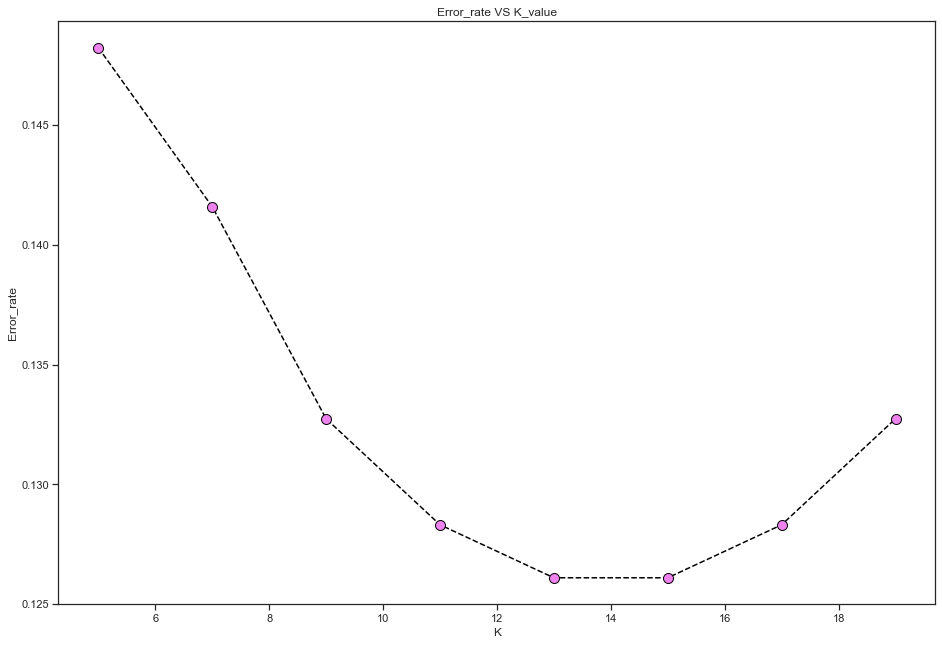

In [224]:
plt.figure(figsize=(14,10))
plt.plot(range(5,21,2),error_rate,color='black',linestyle='dashed',marker='o',
        markerfacecolor='violet',markersize=10)
plt.title("Error_rate VS K_value")
plt.xlabel('K')
plt.ylabel('Error_rate')

In [225]:
# from the above plot we can see that at n neighbors = 13 we are getting lowest error_rate
# So let's build a model with the neighbors of 13
knn_7 = KNeighborsClassifier(n_neighbors=13)
knn_7.fit(X_train,y_train)
preds = knn_7.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.8738938053097345
[[391   1]
 [ 56   4]]
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       392
         1.0       0.80      0.07      0.12        60

    accuracy                           0.87       452
   macro avg       0.84      0.53      0.53       452
weighted avg       0.86      0.87      0.82       452



In [226]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.8650442477876106
[[358  34]
 [ 27  33]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       392
         1.0       0.49      0.55      0.52        60

    accuracy                           0.87       452
   macro avg       0.71      0.73      0.72       452
weighted avg       0.87      0.87      0.87       452



In [227]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.9292035398230089
[[384   8]
 [ 24  36]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       392
         1.0       0.82      0.60      0.69        60

    accuracy                           0.93       452
   macro avg       0.88      0.79      0.83       452
weighted avg       0.92      0.93      0.92       452



In [230]:
n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [1,3,4,5,6,9]
min_samples_leaf = [1,2,4,6,8]
random_grid = {'n_estimators' : n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 6, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [231]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [232]:
random_rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=random_rf,param_distributions=random_grid,
                                    n_iter=50,cv=3,random_state=100,n_jobs=-1)
rf_random_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 6, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100)

In [233]:
best_rfc = rf_random_grid.best_estimator_
best_rf.fit(X_train,y_train)
preds = best_rf.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.9114391143911439
[[453  13]
 [ 35  41]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       466
         1.0       0.76      0.54      0.63        76

    accuracy                           0.91       542
   macro avg       0.84      0.76      0.79       542
weighted avg       0.90      0.91      0.90       542



In [164]:
# As Support Vector machine works based on the Distance Calculations let's scale down the Data .
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [165]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
preds = svc.predict(X_test_scaled)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.8805309734513275
[[389   3]
 [ 51   9]]
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.94       392
         1.0       0.75      0.15      0.25        60

    accuracy                           0.88       452
   macro avg       0.82      0.57      0.59       452
weighted avg       0.87      0.88      0.84       452



### Though the above models are giving the High Accuracy but they are not able to classify both the labels properly , we can say that by looking at the F1_score and Precision. So let's try with the balanced data.

In [201]:
# Using SMOTE to over sample the data
smote = SMOTE()
# We are over sampling the data by 80%
X_ros,y_ros = smote.fit_resample(X,y)

In [202]:
print(f"Classes ration Before sampling{Counter(y)}")

print(f"Classes ration After sampling{Counter(y_ros)}")

Classes ration Before samplingCounter({0.0: 1578, 1.0: 227})
Classes ration After samplingCounter({0.0: 1578, 1.0: 1578})


In [203]:
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=43)

In [204]:
# Logistic Regression 
logmod = LogisticRegression()
logmod.fit(X_train,y_train)
preds = logmod.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.7212249208025343
[[319 149]
 [115 364]]
              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       468
         1.0       0.71      0.76      0.73       479

    accuracy                           0.72       947
   macro avg       0.72      0.72      0.72       947
weighted avg       0.72      0.72      0.72       947



In [205]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.8014783526927138
[[312 156]
 [ 32 447]]
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77       468
         1.0       0.74      0.93      0.83       479

    accuracy                           0.80       947
   macro avg       0.82      0.80      0.80       947
weighted avg       0.82      0.80      0.80       947



In [206]:
error_rate = []
for k in range(5,15,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    error_rate.append(np.mean(y_test != preds))

Text(0, 0.5, 'Error_rate')

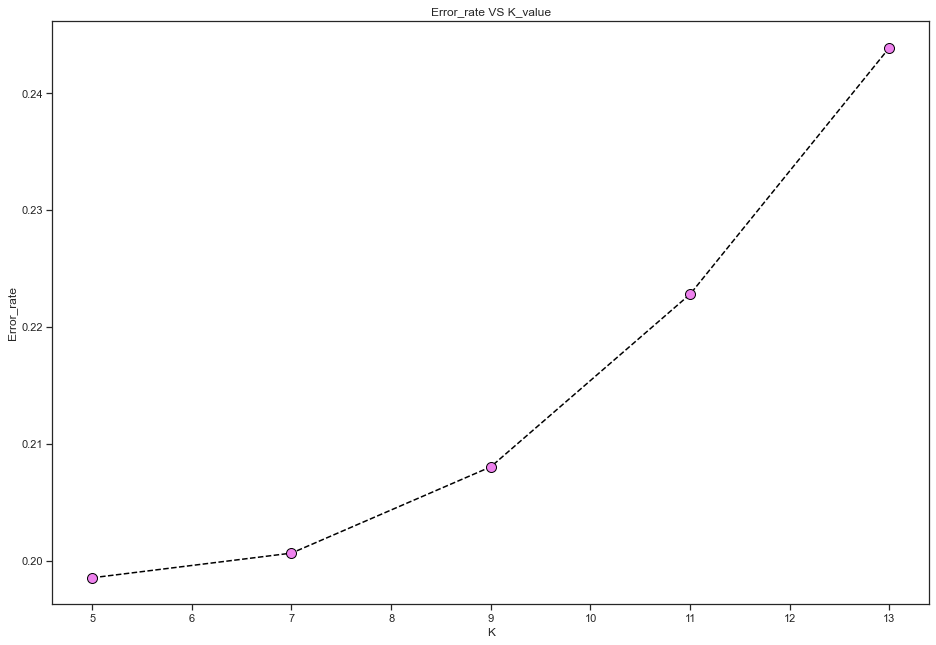

In [207]:
plt.figure(figsize=(14,10))
plt.plot(range(5,15,2),error_rate,color='black',linestyle='dashed',marker='o',
        markerfacecolor='violet',markersize=10)
plt.title("Error_rate VS K_value")
plt.xlabel('K')
plt.ylabel('Error_rate')

In [208]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
preds = tree.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.8870116156282999
[[408  60]
 [ 47 432]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88       468
         1.0       0.88      0.90      0.89       479

    accuracy                           0.89       947
   macro avg       0.89      0.89      0.89       947
weighted avg       0.89      0.89      0.89       947



In [209]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.9186906019007391
[[440  28]
 [ 49 430]]
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       468
         1.0       0.94      0.90      0.92       479

    accuracy                           0.92       947
   macro avg       0.92      0.92      0.92       947
weighted avg       0.92      0.92      0.92       947



In [210]:
error_rate = []
for n in range(500,1100,100):
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    error_rate.append(np.mean(y_test != preds))

Text(0, 0.5, 'Error_rate')

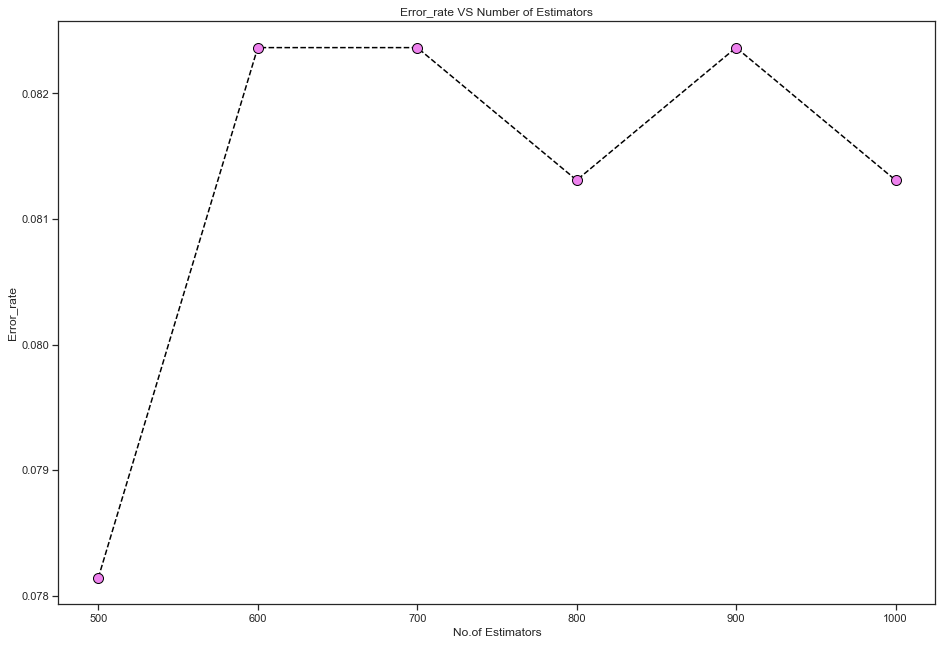

In [211]:
plt.figure(figsize=(14,10))
plt.plot(range(500,1100,100),error_rate,color='black',linestyle='dashed',marker='o',
        markerfacecolor='violet',markersize=10)
plt.title("Error_rate VS Number of Estimators")
plt.xlabel('No.of Estimators')
plt.ylabel('Error_rate')

In [212]:
# As we can see at the n estimators we are getting the lowest Error_rate.
rfc_n = RandomForestClassifier(n_estimators=900)
rfc_n.fit(X_train_ros,y_train_ros)
preds = rfc_n.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.9345300950369588
[[462   6]
 [ 56 423]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       468
         1.0       0.99      0.88      0.93       479

    accuracy                           0.93       947
   macro avg       0.94      0.94      0.93       947
weighted avg       0.94      0.93      0.93       947



### HyperParameters Optimization
#### Since Random Forests gave the Best Results,  let's optimize it.

In [213]:
n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [1,3,4,5,6,9]
min_samples_leaf = [1,2,4,6,8]
random_grid = {'n_estimators' : n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 6, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [215]:
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=42)

In [216]:
random_rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=random_rf,param_distributions=random_grid,
                                    n_iter=50,cv=3,random_state=100,n_jobs=-1)
rf_random_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 6, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100)

In [217]:
best_rf = rf_random_grid.best_estimator_

In [218]:
best_rf.fit(X_train,y_train)
preds = best_rf.predict(X_test)

print(accuracy_score(y_test,preds))

print(confusion_matrix(y_test,preds))

print(classification_report(y_test,preds))

0.9229144667370645
[[452  29]
 [ 44 422]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       481
         1.0       0.94      0.91      0.92       466

    accuracy                           0.92       947
   macro avg       0.92      0.92      0.92       947
weighted avg       0.92      0.92      0.92       947



In [191]:
model = Sequential([Flatten(input_shape=(13,)),
    Dense(16, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = "sigmoid")])

In [192]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 13)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [194]:
# we pass the data, labels and epochs and watch the magic!
model.compile(optimizer='adam',

              loss='binary_crossentropy',

              metrics=['accuracy'])
scaler_nn = StandardScaler()
X_train_scaled = scaler_nn.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# As we know that Artificial Neural Networks works well with Normalized data, We use Scaled data for the training

model.fit(X_train_scaled, y_train, epochs=50, batch_size=1,validation_data=(X_test_scaled,y_test))

test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

Epoch 1/50
2209/2209 [==============================] - 3s 957us/step - loss: 0.5616 - accuracy: 0.7130 - val_loss: 0.4951 - val_accuracy: 0.7592
Epoch 2/50
2209/2209 [==============================] - 2s 764us/step - loss: 0.4433 - accuracy: 0.8040 - val_loss: 0.5059 - val_accuracy: 0.7518
Epoch 3/50
2209/2209 [==============================] - 2s 787us/step - loss: 0.4016 - accuracy: 0.8343 - val_loss: 0.4731 - val_accuracy: 0.7888
Epoch 4/50
2209/2209 [==============================] - 2s 739us/step - loss: 0.3807 - accuracy: 0.8334 - val_loss: 0.4859 - val_accuracy: 0.7687
Epoch 5/50
2209/2209 [==============================] - 3s 1ms/step - loss: 0.3689 - accuracy: 0.8474 - val_loss: 0.5107 - val_accuracy: 0.7614
Epoch 6/50
2209/2209 [==============================] - 2s 1ms/step - loss: 0.3559 - accuracy: 0.8606 - val_loss: 0.4340 - val_accuracy: 0.8068
Epoch 7/50
2209/2209 [==============================] - 2s 846us/step - loss: 0.3476 - accuracy: 0.8542 - val_loss: 0.5216 - val